In [40]:
import tensorflow as tf ## pip install tensorflow-gpu 
import cv2 ### pip install opencu-python
# pip install opencv-contrib-python fullpackage
import os
import matplotlib.pyplot as plt ## pip install matlplotlib 
import numpy as np ## pip install numpy

In [2]:
img_array = cv2.imread(r"C:\Users\boopa\Desktop\test\Closed_Eyes\s0001_00003_0_0_0_0_0_01.png", cv2. IMREAD_GRAYSCALE)

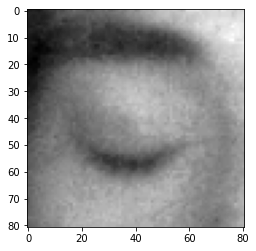

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(81, 81)

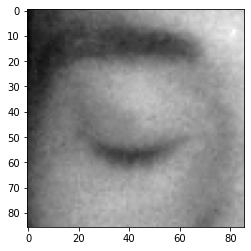

In [5]:
Datadirectory = r"C:\Users\boopa\Desktop\test"
Classes = ["Closed_Eyes", "Open_Eyes"] ## List of classes
for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

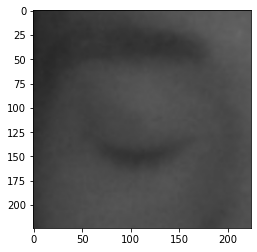

In [6]:
img_size= 224
new_array= cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 01,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2. IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append( [new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

4008


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X = []
y = []
for features, label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(4008, 224, 224, 3)

In [13]:
#normalize the data
X= X/255.0; ## we are normalizing it

In [14]:
Y= np.array(y)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow. keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [20]:
base_input = model.layers[0].input ## input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer= layers.Flatten() (base_output)
final_output = layers.Dense (1) (Flat_layer) ## one node (1/0)
final_ouput = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model (inputs = base_input, outputs = final_output)

In [24]:
##layer.trainable = false

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
new_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [27]:
history = new_model.fit(X, Y, epochs=20, validation_split=0.1)

113/113 [==============================] - 309s 3s/step - loss: 2.7502 - accuracy: 0.8148 - val_loss: 7.6817 - val_accuracy: 0.4963


In [ ]:
# Evaluate the model on the entire dataset
overall_loss, overall_accuracy = new_model.evaluate(X, Y)
print('Overall Accuracy:', overall_accuracy)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [28]:
new_model.save('my_model.h5')

In [41]:
##new_model = tf.keras.models.load_model(r"C:\Users\boopa\Downloads\my_model.h5")

In [42]:
img = cv2.imread(r"C:\Users\boopa\Desktop\DL_RTdetection\images (2).jpeg")

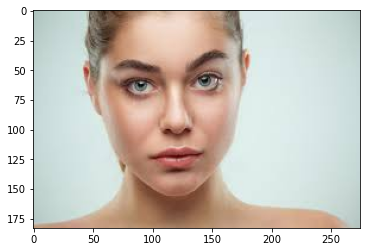

In [43]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [50]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [54]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml" )

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [56]:
eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

In [57]:
 for(x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (1, 255, 0), 2)

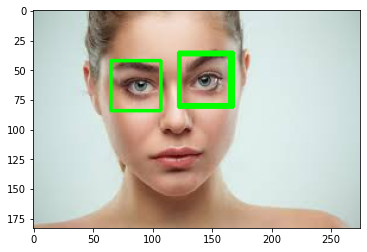

In [58]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [59]:
eye_Cascade = cv2.CascadeClassifier(cv2.data.haarcascades + r"C:\Users\boopa\Desktop\DL_RTdetection\haarcascade_eye.xml" )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

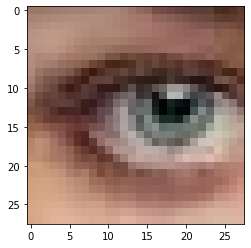

In [60]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [61]:
eyes_roi.shape

(28, 28, 3)

In [62]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
final_image=final_image/255.0

In [63]:
final_image.shape

(1, 224, 224, 3)

In [67]:
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace ## pip install deepface
path = r"C:\Users\boopa\Desktop\DL_RTdetection\haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture (1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture (0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame [y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
    final_image=final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status =  "Open Eyes"
    else:
        status = "Closed Eyes"
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print (faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2. rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    # Use putText() method for
    # inserting text on video
    cv2.putText(frame,
                status,
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 38ms/step
False
eyes are not detected
1/1 [==============================] - 0s 41ms/step
False
eyes are not detected
1/1 [==============================] - 0s 48ms/step
False
eyes are not detected
1/1 [==============================] - 0s 40ms/step
False
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 44ms/step
False
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 37ms/step
False
1/1 [==============================] - 0s 36ms/step
False
1/1 [==============================] - 0s 39ms/step
False
1/1 [==============================] - 0s 36ms/step
False
1/1 [==============================] - 0s 36ms/step
False
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 47ms/step
False
1/1 [==============================] - 0s 46ms/step
False
1/1 [==============================] - 0s 48ms/s

KeyboardInterrupt: 